In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tech_list =['AAPL','GOOg','MSFT','AMZN']
end_date=datetime.now()
start_date=datetime(end_date.year-1,end_date.month,end_date.day)

In [3]:
for stock in tech_list:
    globals()[stock]=data.DataReader(stock,'yahoo',start_date,end_date)
    
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-27,55.240002,54.320000,55.134998,54.705002,101408000.0,54.167561
2019-09-30,56.145000,55.197498,55.224998,55.992500,103909600.0,55.442406
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200.0,55.595886
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200.0,54.202213
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000.0,54.662643
...,...,...,...,...,...,...
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002
2020-09-22,112.860001,109.160004,112.680000,111.809998,183055400.0,111.809998
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,107.120003


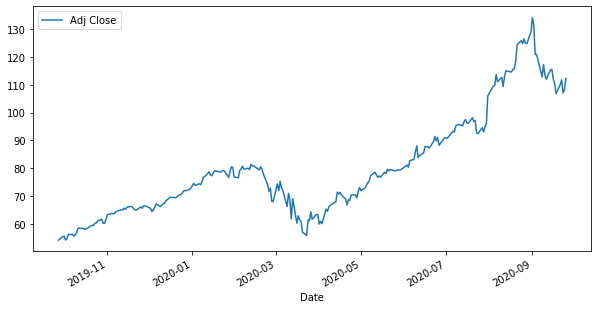

In [4]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,5))

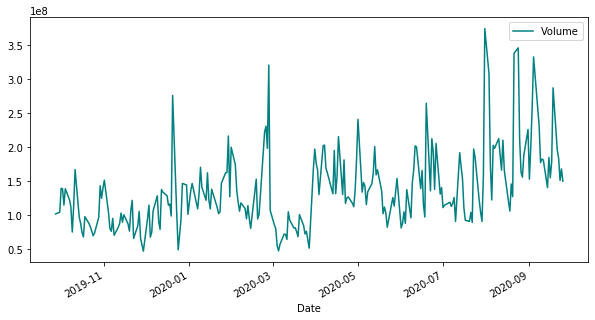

In [5]:
AAPL.Volume.plot(legend=True,color='teal',figsize=(10,5))

In [6]:
ma_day=[10,30,50]
for ma in ma_day:
    col_na="MA %s" %(str(ma))
    x=AAPL['Adj Close'].rolling(ma)
    AAPL[col_na]=x.mean()

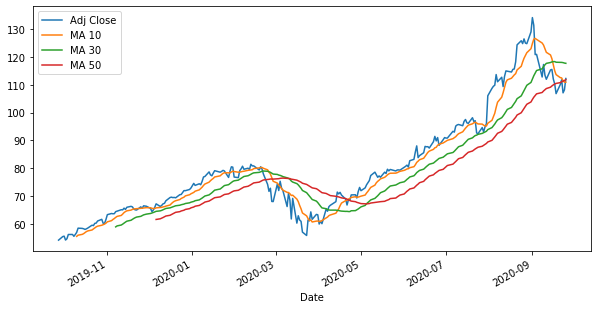

In [7]:
AAPL[['Adj Close','MA 10','MA 30','MA 50']].plot(legend=True,figsize=(10,5))

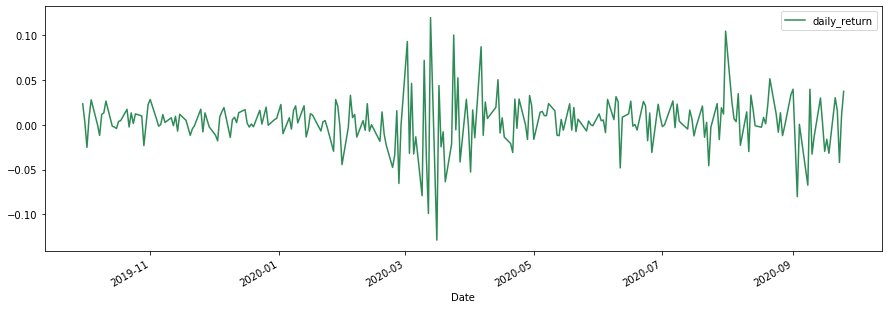

In [8]:
AAPL['daily_return']=  AAPL['Adj Close'].pct_change()
AAPL.daily_return.plot(legend=True,figsize=(15,5),color='seagreen')
    

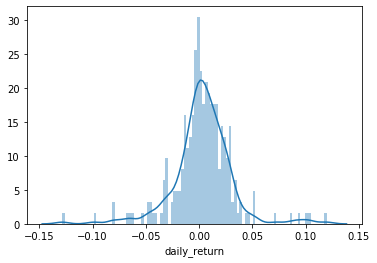

In [9]:
sns.distplot(AAPL.daily_return,bins=100)

In [13]:
closing_df=data.DataReader(tech_list,'yahoo',start_date,end_date)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOg,MSFT,AMZN
Date,,,,
2019-09-27,54.167561,1225.089966,136.179642,1725.449951
2019-09-30,55.442406,1219.000000,137.465027,1735.910034
2019-10-01,55.595886,1205.099976,135.527100,1735.650024
2019-10-02,54.202213,1176.630005,133.134323,1713.229980
2019-10-03,54.662643,1187.829956,134.745972,1724.420044


In [14]:
tech_rets=closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOg,MSFT,AMZN
Date,,,,
2019-09-27,NaN,NaN,NaN,NaN
2019-09-30,0.023535,-0.004971,0.009439,0.006062
2019-10-01,0.002768,-0.011403,-0.014098,-0.000150
2019-10-02,-0.025068,-0.023625,-0.017655,-0.012917
2019-10-03,0.008495,0.009519,0.012105,0.006532


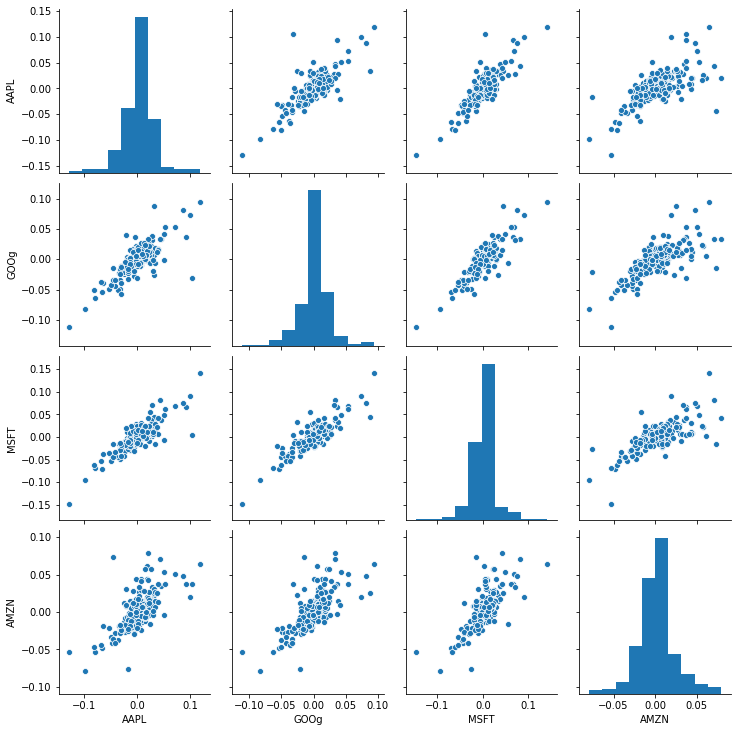

In [15]:
sns.pairplot(tech_rets.dropna())

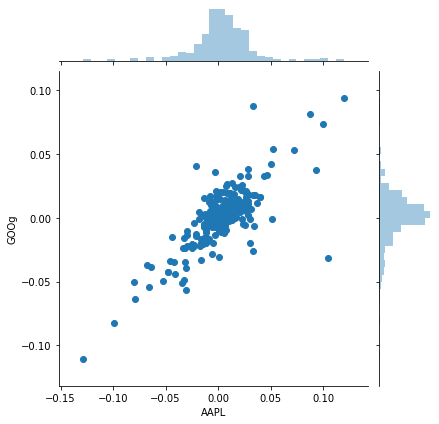

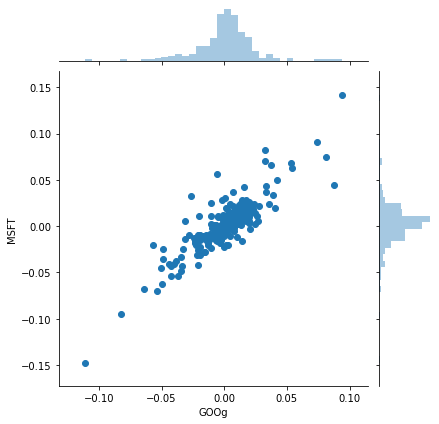

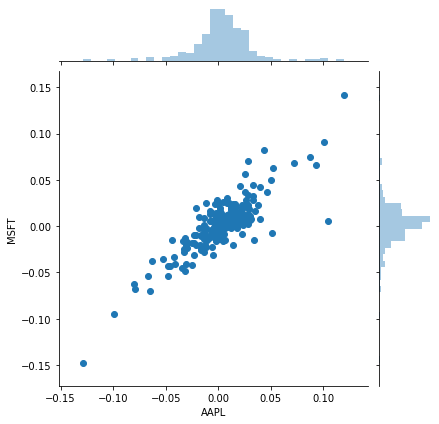

In [16]:
sns.jointplot('AAPL','GOOg',tech_rets)
sns.jointplot('GOOg','MSFT',tech_rets)
sns.jointplot('AAPL','MSFT',tech_rets)

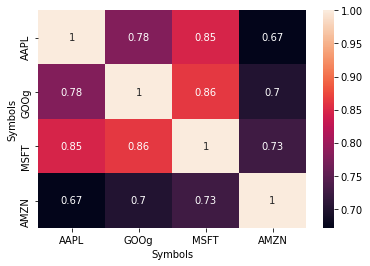

In [17]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

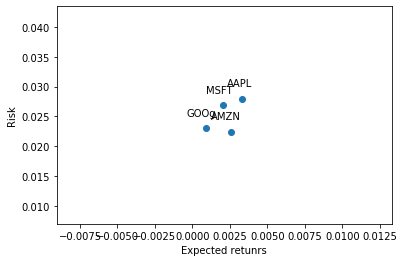

In [28]:
rets=tech_rets.dropna()
plt.scatter(rets.mean(),rets.std())
plt.xlabel('Expected retunrs')
plt.ylabel('Risk')
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(10,10),textcoords='offset points',ha='right',va='bottom')